### Student Information
Name: Thanachot Leelasuwonvong 

Student ID:110065424

GitHub ID:

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [1]:
### Begin Assignment Here

In [1]:
import numpy as np
import pandas as pd

In [2]:
#import file
# declare my path of the file and assign it to filename_00
# use the function of pandas: read_table to read the flat file(txt).setting header to none as it has no header forehand
# and assign coulumn name used list obj.

filename_00 = 'C:\\Users\\Lenovo\\Desktop\\DataMiningClass\\sentiment labelled sentences_2\\sentiment labelled sentences\\amazon_cells_labelled.txt'
data = pd.read_table(filename_00, header=None,names = ['msg','sentiment'])
data

,msg,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [3]:
#  filter the data by  amazon only



filename_00 = 'C:\\Users\\Lenovo\\Desktop\\DataMiningClass\\sentiment labelled sentences_2\\sentiment labelled sentences\\amazon_cells_labelled.txt'
data00 = pd.read_table(filename_00, header=None,names = ['msg','sentiment'])

data00['source'] = 'amazon'
data00

,msg,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,The screen does get smudged easily because it ...,0,amazon
996,What a piece of junk.. I lose more calls on th...,0,amazon
997,Item Does Not Match Picture.,0,amazon
998,The only thing that disappoint me is the infra...,0,amazon


In [4]:
# I also take sample from each of the companies by n = 300
am_samp = data00.sample(n=300)
am_samp 

,msg,sentiment,source
575,I can barely ever hear on it and am constantly...,0,amazon
240,Big Disappointment with calendar sync.,0,amazon
585,"It feels poorly constructed, the menus are dif...",0,amazon
445,"I searched the Internet, and found this one to...",1,amazon
836,"Horrible, horrible protector.",0,amazon
...,...,...,...
723,Think it over when you plan to own this one!Th...,0,amazon
124,Gets the job done.,1,amazon
289,"This item is great, installed it, let it charg...",1,amazon
222,"Simple, lightweight and great fit.",1,amazon


In [5]:
#  filter the data by  imdb only

filename_01 = 'C:\\Users\\Lenovo\\Desktop\\DataMiningClass\\sentiment labelled sentences_2\\sentiment labelled sentences\\imdb_labelled.txt'
data01 = pd.read_table(filename_01, header=None,names = ['msg','sentiment'])
data01['source'] = 'imdb'
len(data01)



748

In [6]:
imdp_samp = data01.sample(n=300)
imdp_samp

,msg,sentiment,source
330,Whatever prompted such a documentary is beyond...,0,imdb
344,"While you don't yet hear Mickey speak, there a...",1,imdb
141,"It features an outlandish array of memorable, ...",1,imdb
185,The sets (especially designed to work with the...,1,imdb
681,Kathy Bates is wonderful in her characters sub...,1,imdb
...,...,...,...
568,And it was boring.,0,imdb
653,"One of the most boring,pointless movies I have...",0,imdb
730,"It's a sad movie, but very good.",1,imdb
203,For people who are first timers in film making...,1,imdb


In [7]:
#  filter the data by  yelp only

filename_02 = 'C:\\Users\\Lenovo\\Desktop\\DataMiningClass\\sentiment labelled sentences_2\\sentiment labelled sentences\\yelp_labelled.txt'
data02 = pd.read_table(filename_02, header=None,names = ['msg','sentiment'])
data02['source'] = 'yelp'
data02
len(data02)

1000

In [8]:
yelp_samp = data02.sample(n=300)
yelp_samp

,msg,sentiment,source
119,Although I very much liked the look and sound ...,0,yelp
922,"Every time I eat here, I see caring teamwork t...",1,yelp
324,Favorite place in town for shawarrrrrrma!!!!!!,1,yelp
798,Mediocre food.,0,yelp
587,I hate those things as much as cheap quality b...,0,yelp
...,...,...,...
117,I've had better atmosphere.,0,yelp
120,I just don't know how this place managed to se...,0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp
477,The steaks are all well trimmed and also perfe...,1,yelp


In [9]:
#Preprocessing

In [10]:
#appending table together

In [41]:
db = data00.append([data01,data02])
db

,msg,sentiment,source
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [42]:
# the sampling data set that the number of rows from each of the companiews has been taken by n=300
db_sample = am_samp.append([imdp_samp,yelp_samp ])
db_sample

,msg,sentiment,source
575,I can barely ever hear on it and am constantly...,0,amazon
240,Big Disappointment with calendar sync.,0,amazon
585,"It feels poorly constructed, the menus are dif...",0,amazon
445,"I searched the Internet, and found this one to...",1,amazon
836,"Horrible, horrible protector.",0,amazon
...,...,...,...
117,I've had better atmosphere.,0,yelp
120,I just don't know how this place managed to se...,0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp
477,The steaks are all well trimmed and also perfe...,1,yelp


In [43]:
# Check if it has missing value issue that I should handle
#No missing value (thanks god!)
db.isnull()

,msg,sentiment,source
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
995,False,False,False
996,False,False,False
997,False,False,False
998,False,False,False


In [163]:
#check duplicated value
db.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 2748, dtype: bool

In [44]:

# I assume that the length of word might be a significant factore related to sentiment;Ex, the long msg might be something
# that we should take a look because it may reflect the pain point of user.

# add column that indicate length of msg; using .str.len()

db['length']= db['msg'].str.len()
db


,msg,sentiment,source,length
0,So there is no way for me to plug it in here i...,0,amazon,82
1,"Good case, Excellent value.",1,amazon,27
2,Great for the jawbone.,1,amazon,22
3,Tied to charger for conversations lasting more...,0,amazon,79
4,The mic is great.,1,amazon,17
...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,66
996,Appetite instantly gone.,0,yelp,24
997,Overall I was not impressed and would not go b...,0,yelp,50
998,"The whole experience was underwhelming, and I ...",0,yelp,91


In [45]:
# try to explore the basic measuremen of data with .describe()
db.describe()

,sentiment,length
count,2748.000000,2748.000000
mean,0.504367,71.528384
std,0.500072,201.987266
min,0.000000,7.000000
25%,0.000000,32.000000
50%,1.000000,55.000000
75%,1.000000,87.000000
max,1.000000,7944.000000


In [46]:
# As length being continued data, I want to adjust thenm to be catagorical data so it might be more easier 
# when I try to visuallize them by graph.
# considering divide them into percentile; I refer such numeric measurement from above.

conditions = [
    (db['length'] <= 32),
    (db['length'] > 32) & (db['length'] < 87),
    (db['length'] > 87),
    ]

In [47]:
values=['Q1','Q2','Q3']

In [58]:
db['Percentile']=np.select(conditions, values)

In [59]:
db

,msg,sentiment,source,length,Percentile
0,So there is no way for me to plug it in here i...,0,amazon,82,Q2
1,"Good case, Excellent value.",1,amazon,27,Q1
2,Great for the jawbone.,1,amazon,22,Q1
3,Tied to charger for conversations lasting more...,0,amazon,79,Q2
4,The mic is great.,1,amazon,17,Q1
...,...,...,...,...,...
995,I think food should have flavor and texture an...,0,yelp,66,Q2
996,Appetite instantly gone.,0,yelp,24,Q1
997,Overall I was not impressed and would not go b...,0,yelp,50,Q2
998,"The whole experience was underwhelming, and I ...",0,yelp,91,Q3


In [66]:
db_sample

,msg,sentiment,source
575,I can barely ever hear on it and am constantly...,0,amazon
240,Big Disappointment with calendar sync.,0,amazon
585,"It feels poorly constructed, the menus are dif...",0,amazon
445,"I searched the Internet, and found this one to...",1,amazon
836,"Horrible, horrible protector.",0,amazon
...,...,...,...
117,I've had better atmosphere.,0,yelp
120,I just don't know how this place managed to se...,0,yelp
999,"Then, as if I hadn't wasted enough of my life ...",0,yelp
477,The steaks are all well trimmed and also perfe...,1,yelp


In [61]:
# make a pie chart to the sum of sentiment by using sample set of data 
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
X = db_sample.groupby('source')['sentiment'].sum()

In [71]:
Y = db.groupby('source')['sentiment'].sum()

Text(0.5, 1.0, 'proportion of positive sentiment by company')

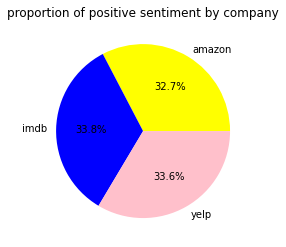

In [64]:
# I sum up the sentiment value of each company and it turns out that each of them receive quite equially number
# of positive sentiment msg

company = ['amazon', 'imdb', 'yelp']
cl = ['yellow','blue','pink']
plt.pie(X, labels=company, colors = cl, autopct = '%2.1f%%')
plt.title('proportion of positive sentiment by company')

In [73]:
#extract only data in percentile = Q2 
# create a graph that help to visualize in that interval

Q2 = ['Q2']
db_q2 = db[db['Percentile'].isin(Q2)]



{'whiskers': [<matplotlib.lines.Line2D at 0x1dd00353760>,
 'caps': [<matplotlib.lines.Line2D at 0x1dd00353dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1dd00353310>,
 'medians': [<matplotlib.lines.Line2D at 0x1dd0035f520>,
 'fliers': [<matplotlib.lines.Line2D at 0x1dd0035f8b0>,
 'means': []}

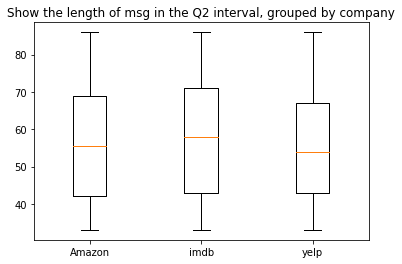

In [74]:
# from the graph it tell the lenght of msg groupped by each company: mean, med, max, min 

amazon = db_q2.loc[db_q2.source == 'amazon']['length'] 
imdb= db_q2.loc[db_q2.source == 'imdb']['length'] 
yelp= db_q2.loc[db_q2.source == 'yelp']['length']
labels = ['Amazon', 'imdb', 'yelp']

plt.title('Show the length of msg in the Q2 interval, grouped by company')
plt.boxplot([amazon,imdb,yelp], labels=labels)

In [78]:
# find the freqency of text

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(db.msg)
X_counts




<2748x5155 sparse matrix of type '<class 'numpy.int64'>'
	with 30275 stored elements in Compressed Sparse Row format>

In [152]:

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0::10][:][0:40]]
plot_x


['term_00',
 'term_18',
 'term_1986',
 'term_23',
 'term_3o',
 'term_510',
 'term_80s',
 'term_abandoned',
 'term_absolutely',
 'term_accessable',
 'term_accomodate',
 'term_achille',
 'term_activated',
 'term_adaptation',
 'term_admiration',
 'term_affleck',
 'term_ages',
 'term_airport',
 'term_allergy',
 'term_alongside',
 'term_amazed',
 'term_amount',
 'term_angeles',
 'term_anita',
 'term_anti',
 'term_anywhere',
 'term_appears',
 'term_appropriate',
 'term_armageddon',
 'term_article',
 'term_ask',
 'term_assumed',
 'term_att',
 'term_attitudes',
 'term_auto',
 'term_awards',
 'term_baaaaaad',
 'term_background',
 'term_balance',
 'term_barcelona']

In [153]:
plot_z = X_count[0:40, 0:40].toarray()

In [154]:
plot_y = ["doc_"+ str(i) for i in list(db.index)[0:40]]

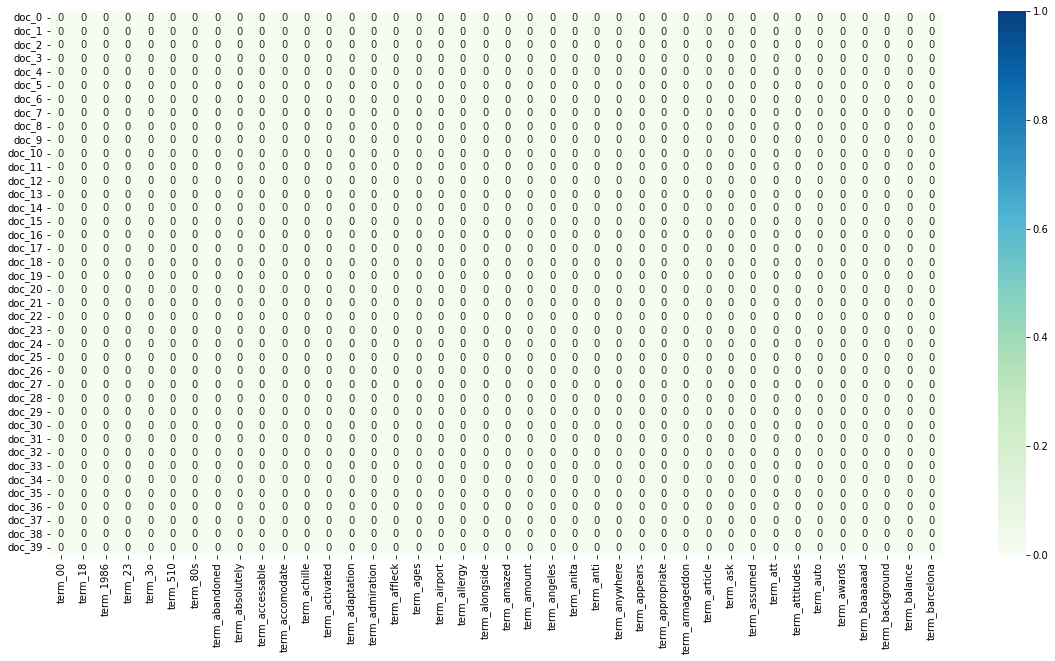

In [157]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="GnBu",
                 vmin=0, vmax=1, annot=True)
plt.show()

In [178]:
#transfrom source (catagorical data) into onehot encoding

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(db.source)
mlb.classes_
db['bin_category'] = mlb.transform(db['source']).tolist()
db[::200][:][:10]






,msg,sentiment,source,length,Percentile,bin_category
0,So there is no way for me to plug it in here i...,0,amazon,82,Q2,"[1, 0, 0]"
200,The color is even prettier than I thought it w...,1,amazon,93,Q3,"[1, 0, 0]"
400,what a disappointment,0,amazon,21,Q1,"[1, 0, 0]"
600,Their Research and Development division obviou...,1,amazon,75,Q2,"[1, 0, 0]"
800,"Good , works fine.",1,amazon,18,Q1,"[1, 0, 0]"
0,"A very, very, very slow-moving, aimless movie ...",0,imdb,87,0,"[0, 1, 0]"
200,Non-linear narration thus many flashbacks and ...,1,imdb,86,Q2,"[0, 1, 0]"
400,Every element of this story was so over the to...,0,imdb,118,Q3,"[0, 1, 0]"
600,"It is wonderful and inspiring to watch, and I ...",1,imdb,100,Q3,"[0, 1, 0]"
52,Their chow mein is so good!,1,yelp,27,Q1,"[0, 0, 1]"


In [150]:
score = X_counts.toarray()
score

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(db['msg'])
print(tfidf_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [27]:
tfidf_matrix

<2748x5155 sparse matrix of type '<class 'numpy.float64'>'
	with 30275 stored elements in Compressed Sparse Row format>

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
cosinescore = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [86]:
cosinescore

array([[1.        , 0.        , 0.07252812, ..., 0.07971005, 0.07648904,
        0.14328385],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.07252812, 0.        , 1.        , ..., 0.        , 0.01738725,
        0.03878838],
       ...,
       [0.07971005, 0.        , 0.        , ..., 1.        , 0.12097452,
        0.        ],
       [0.07648904, 0.        , 0.01738725, ..., 0.12097452, 1.        ,
        0.05935405],
       [0.14328385, 0.        , 0.03878838, ..., 0.        , 0.05935405,
        1.        ]])

In [33]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

%matplotlib inline
from sklearn.metrics import plot_confusion_matrix

In [97]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_counts, db.sentiment, test_size=0.25)

#bnb_counts = BernoulliNB(binarize=0.0)
#bnb_counts.fit(X_train1, Y_train1)
mnb_counts = MultinomialNB()
mnb_counts.fit(X_train1, Y_train1)

MultinomialNB()

In [98]:
mnb_counts.score(X_test1, Y_test1)

0.7962154294032023

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


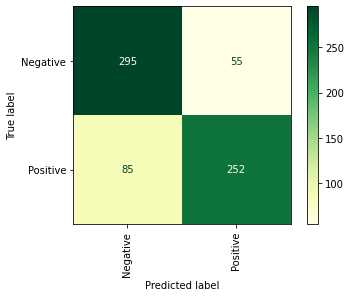

In [112]:
plot_confusion_matrix(mnb_counts, X_test1, Y_test1, display_labels=['Negative', 'Positive'], cmap='YlGn', xticks_rotation='vertical')

In [102]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(tfidf_matrix, db.sentiment, test_size=0.25)

#bnb_tfidf = BernoulliNB(binarize=0.0)
#bnb_tfidf.fit(X_train2, Y_train2)
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(X_train2, Y_train2)

MultinomialNB()

In [107]:
mnb_tfidf.score(X_test2, Y_test2)

0.8442503639010189

C:\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


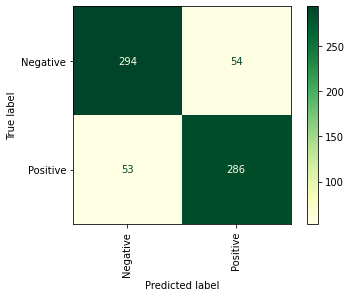

In [113]:
plot_confusion_matrix(mnb_tfidf, X_test2, Y_test2, display_labels=['Negative', 'Positive'], cmap='YlGn', xticks_rotation='vertical')

In [ ]:
#Both classifier performance yield similar result; However, thidf generate a bit higher result but not significant different.